# Project 2 - Finansiell analys applikation
#### Description: 
* Ta ut tidsperioder för att lätt göra en overview analys av en tidsperiod med avseende på index SP500

---

In [46]:
# LIBRARIES
## basics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## api/fred
import json
import requests
pd.options.display.max_columns = 90

## API to get data
---

### Yfinance API

In [47]:
import yfinance as yf

# Define the ticker symbol for S&P 500
ticker_symbol = "^GSPC"

# Fetch data
sp500_data = yf.download(ticker_symbol, period="max", interval="1wk")

# The sp500_data DataFrame now contains the historical data

sp500_data


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1927-12-26,17.660000,17.660000,17.660000,17.660000,17.660000,0
1928-01-02,17.760000,17.760000,17.549999,17.660000,17.660000,0
1928-01-09,17.500000,17.580000,17.350000,17.580000,17.580000,0
1928-01-16,17.290001,17.480000,17.260000,17.480000,17.480000,0
1928-01-23,17.639999,17.709999,17.520000,17.690001,17.690001,0
...,...,...,...,...,...,...
2023-07-31,4584.819824,4594.220215,4474.549805,4478.029785,4478.029785,21109110000
2023-08-07,4491.580078,4527.370117,4443.979980,4464.049805,4464.049805,19439590000
2023-08-14,4458.129883,4490.330078,4335.310059,4369.709961,4369.709961,19366670000


### FRED api för bonds/m2 money supply

In [48]:
#api_key
api_key="XXXXXXXXX"

In [49]:
series_id = "M2SL"
url = f"https://api.stlouisfed.org/fred/series/observations?series_id={series_id}&api_key={api_key}&file_type=json&frequency=m"

response = requests.get(url)
data = response.json()

In [50]:
df = pd.DataFrame(data["observations"])
df

,realtime_start,realtime_end,date,value
0,2023-09-05,2023-09-05,1959-01-01,286.6
1,2023-09-05,2023-09-05,1959-02-01,287.7
2,2023-09-05,2023-09-05,1959-03-01,289.2
3,2023-09-05,2023-09-05,1959-04-01,290.1
4,2023-09-05,2023-09-05,1959-05-01,292.2
...,...,...,...,...
770,2023-09-05,2023-09-05,2023-03-01,20876.1
771,2023-09-05,2023-09-05,2023-04-01,20712.1
772,2023-09-05,2023-09-05,2023-05-01,20841.7
773,2023-09-05,2023-09-05,2023-06-01,20890.0


## Functions
---


#### Input Functions

In [51]:
## user input function that sets all to 1wk interval if user selects it
def input_interval():
    return

In [52]:
def input_ticker():
    return

#### Get Functions

In [53]:
def get_tickers():
    """get and show tickers available"""
    # bara yfinance typ
    return

In [54]:
def timeseries_add_diffNreturn(timeseries_data):
    """adds price difference datapoints from the last close AND return from last datapoint"""
    #! kolla så att close.diff gör rätt sak. 
    timeseries_data["Price_Diff"] = timeseries_data["Close"].diff()
    timeseries_data["Total_Return"] = timeseries_data["Price_Diff"] / timeseries_data["Close"].shift(1)
    return timeseries_data

In [55]:
def get_timeseries_yfinance(ticker_symbol="^GSPC", period="max", interval="1wk"):
    """laddar hem och returnar en ticker utifrån specifierade variabler"""
    timeseries_data = yf.download(ticker_symbol, period = period, interval = interval) 
    timeseries_data = timeseries_add_diffNreturn(timeseries_data)
    return timeseries_data

In [56]:
# yfinance how it looks in DATAFRAME
yfinance_series = get_timeseries_yfinance()
yfinance_series.reset_index()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume,Price_Diff,Total_Return
0,1927-12-26,17.660000,17.660000,17.660000,17.660000,17.660000,0,NaN,NaN
1,1928-01-02,17.760000,17.760000,17.549999,17.660000,17.660000,0,0.000000,0.000000
2,1928-01-09,17.500000,17.580000,17.350000,17.580000,17.580000,0,-0.080000,-0.004530
3,1928-01-16,17.290001,17.480000,17.260000,17.480000,17.480000,0,-0.100000,-0.005688
4,1928-01-23,17.639999,17.709999,17.520000,17.690001,17.690001,0,0.210001,0.012014
...,...,...,...,...,...,...,...,...,...
4987,2023-07-31,4584.819824,4594.220215,4474.549805,4478.029785,4478.029785,21109110000,-104.200195,-0.022740
4988,2023-08-07,4491.580078,4527.370117,4443.979980,4464.049805,4464.049805,19439590000,-13.979980,-0.003122
4989,2023-08-14,4458.129883,4490.330078,4335.310059,4369.709961,4369.709961,19366670000,-94.339844,-0.021133
4990,2023-08-21,4380.279785,4458.299805,4356.290039,4405.709961,4405.709961,18106530000,36.000000,0.008239


In [57]:
def get_fred_series(series_id="M2SL"):
    """returns total history of m2 money supply in a dataframe in BILLIONS of dollars"""
    #^ api_key defined above
    # api_key=...

    #^ specifying series & api_key in url
    series_id = series_id
    url = f"https://api.stlouisfed.org/fred/series/observations?series_id={series_id}&api_key={api_key}&file_type=json&frequency=m"
    
    #^ getting data
    response = requests.get(url)
    data = response.json()

    #^ return dataframe with 
    df = pd.DataFrame(data["observations"])
    return df


In [58]:
# FRED data how it looks in a DATAFRAME m2money supply
get_fred_series()

,realtime_start,realtime_end,date,value
0,2023-09-05,2023-09-05,1959-01-01,286.6
1,2023-09-05,2023-09-05,1959-02-01,287.7
2,2023-09-05,2023-09-05,1959-03-01,289.2
3,2023-09-05,2023-09-05,1959-04-01,290.1
4,2023-09-05,2023-09-05,1959-05-01,292.2
...,...,...,...,...
770,2023-09-05,2023-09-05,2023-03-01,20876.1
771,2023-09-05,2023-09-05,2023-04-01,20712.1
772,2023-09-05,2023-09-05,2023-05-01,20841.7
773,2023-09-05,2023-09-05,2023-06-01,20890.0


#### Calculate Functions

In [59]:
def merge_data(ticker_data, fred_data):
    asof_merged_data = pd.merge_asof(ticker_data[["Date", "Close"]].sort_values('Date'), fred_data.sort_values('Date'), on='Date', direction='nearest')
    return asof_merged_data

In [60]:
def correlation_diff_scales(ticker_data, fred_data):
    asof_merged_data = merge_data(ticker_data, fred_data)
    return asof_merged_data["Close"].corr(asof_merged_data["value"]) #! ksk behöver vara columns index istället

In [61]:
def normalize_timeseries(yfinance_series, fred_series, from_date=1959, to_date=2023):
    """compares dates and normalizes them to the same start and finish date, same amount of data points"""

    #^ loc for from_date
    #~ yfinance är första kolumnnen date
    ## vid 1927-12-26, 
    yfinance_series = yfinance_series.reset_index()
    yfinance_series = yfinance_series.loc[((yfinance_series["Date"].dt.year >= from_date) & (yfinance_series["Date"].dt.year <= to_date))]
    
    #^ adjusting to correct data types and same from_date
    #~ fred är 3de kolumnen date
    ## vid 1959-01-01
    fred_series.drop(columns=["realtime_start", "realtime_end"],inplace=True)
    fred_series["date"] = pd.to_datetime(fred_series['date'])
    fred_series["value"] = pd.to_numeric(fred_series["value"])
    fred_series = fred_series.loc[((fred_series["date"].dt.year >= from_date) & (fred_series["date"].dt.year <= to_date))]
    fred_series.rename(columns={fred_series.columns[0]: "Date"}, inplace=True)

    #^ returns both adjusted series, same starting date and 
    return yfinance_series, fred_series

In [62]:
def annualized_return(timeseries_data, time_incrament = "wk"):
    """supposed to return annualized return, #! not working yet"""
    timeseries_data_local = timeseries_update(timeseries_data)

    #^ själva calculationen 
    #? if sats för dem olika tidsintervalerna, typ någon library som kan wk osv och gör om till tid per år
    if time_incrament == "wk":
        timeseries_data_local["Annualized_Return"] = (1+ timeseries_data["Total_Return"]).pow(52) -1
        #? blir detta year over year annualized return då? 
        return timeseries_data_local
    else:
        print("Unknown Time Incrament")
        return "unkown time incrament"
        #global function för loading animation


In [63]:
def total_return(timeseries_data):
    # calculations here to ...
    return

#### Visualization Functions

In [72]:
def plot_compare_two(ticker_data, fred_data, ticker_symbol="S&P500", fred_symbol="M2"):
    plt.figure(figsize=(12,6))
    plt.style.use("seaborn-paper")
    
    ax = ticker_data.plot(kind='line', x='Date', y='Close', label=ticker_symbol, color='Blue')
    ax2 = fred_data.plot(kind='line', x='Date', y='value', label=fred_symbol, secondary_y=True, ax=ax, color='Red')

    ax.set_ylabel('Index', color='Blue')
    ax2.set_ylabel('USD in Billions', color='Red')

    plt.title('S&P500 vs M2 Money Supply')
    plt.show()

In [73]:
def plot_sbs(ticker_data, fred_data, ticker_symbol="S&P500", fred_symbol="M2"):
    fig, ax = plt.subplots(2,1,figsize=(12,6))
    plt.style.use("seaborn-paper")
    sns.lineplot(x="Date", y="Close", label=ticker_symbol, data=ticker_data, ax=ax[0])
    sns.lineplot(x="Date", y="value", data=fred_data, label=fred_symbol, ax=ax[1])

    ax[0].set_ylabel('Index')
    ax[1].set_ylabel('USD in Billions')
    plt.title('S&P500 and M2 Money Supply')

    plt.subplots_adjust(hspace=0.4)

    plt.show()

#### MAIN function

In [83]:
def main_run(ticker="^GSPC", fred_ticker="M2SL", from_date=1959, to_date=2023):
    # input time interval
    interval = "1wk"
    # input period
    period = "max"
    
    # get chosen tickers data
    ticker_data = get_timeseries_yfinance(ticker_symbol=ticker, period=period, interval=interval)

    # get fred_data 
    fred_data = get_fred_series(fred_ticker)

    # normalize time intervall in both series
    ticker_data, fred_data = normalize_timeseries(ticker_data, fred_data, from_date=from_date, to_date=to_date)

    return ticker_data, fred_data
    

In [77]:
def main_plot(ticker_data, fred_data, from_date, to_date):
    # print two graphs so that you can see them clearly
    plot_sbs(ticker_data, fred_data)

    # print correlation
    correlation = correlation_diff_scales(ticker_data, fred_data)
    print(correlation)

    # print both series in same graph so that you can compare them
    plot_compare_two(ticker_data, fred_data)


## TESTA/ komihåg

* testa total return om man tar vecka som data punkt, eller år?

### Testing functions together

* LETA efter korrelationer mellan m2 money supply och sp500, hur stark är den OSV. kräver mer statistik vetande


## Putting it together

C:\Users\erik_\AppData\Local\Temp\ipykernel_6616\1047862017.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-paper")


[*********************100%%**********************]  1 of 1 completed


C:\Users\erik_\AppData\Local\Temp\ipykernel_6616\976696699.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fred_series.rename(columns={fred_series.columns[0]: "Date"}, inplace=True)
C:\Users\erik_\AppData\Local\Temp\ipykernel_6616\2328451532.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-paper")


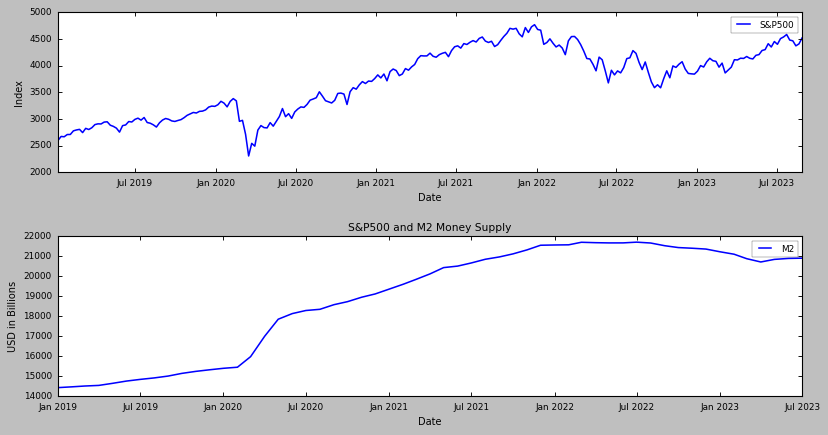

0.8884509297486544


C:\Users\erik_\AppData\Local\Temp\ipykernel_6616\2182539581.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-paper")


<Figure size 960x480 with 0 Axes>

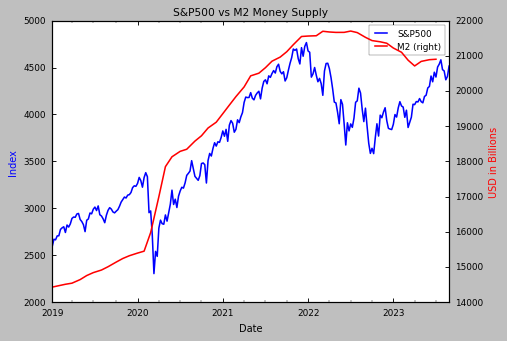

In [74]:
plt.style.use("seaborn-paper")
main_run(from_date=2019, to_date=2023) #sp500 and m2sl
# löner
# inflation
# sparningsrate
# intresssant fenomen att folk sparade pengar som de släpte på efter lockdown


[*********************100%%**********************]  1 of 1 completed


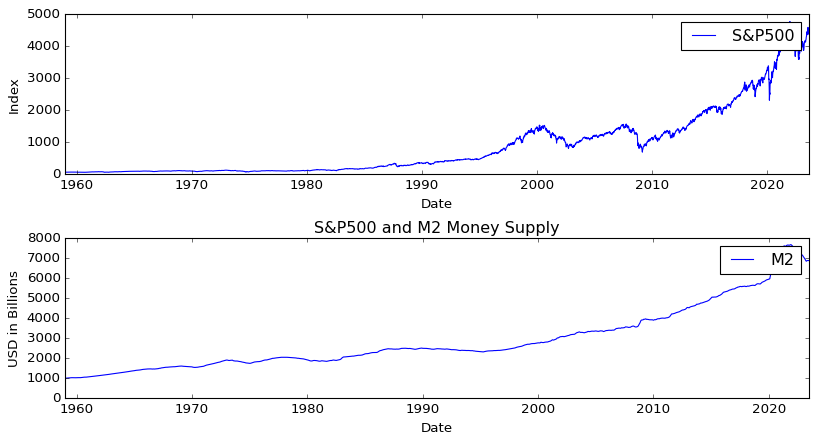

0.9629810201345324


<Figure size 960x480 with 0 Axes>

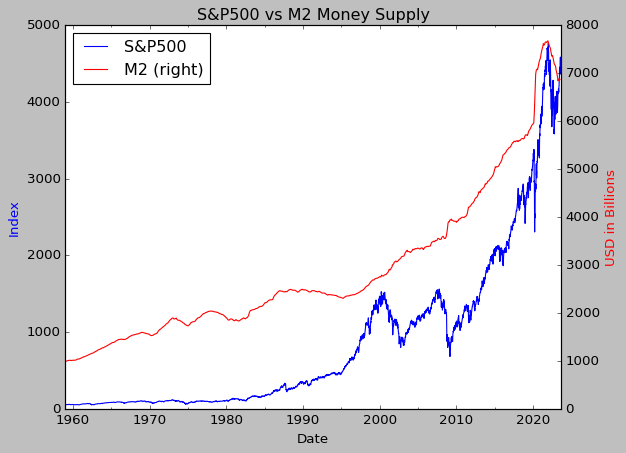

In [68]:
main_run(fred_ticker="M2REAL") # sp500 and m2real

[*********************100%%**********************]  1 of 1 completed


C:\Users\erik_\AppData\Local\Temp\ipykernel_6616\1892106803.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-paper")


<Figure size 960x480 with 0 Axes>

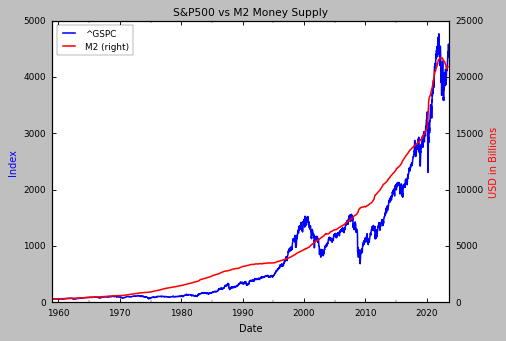

In [85]:
ticker_data, fred_data = main_run()

plt.figure(figsize=(12,6))
plt.style.use("seaborn-paper")

ax = ticker_data.plot(kind='line', x='Date', y='Close', label=ticker_symbol, color='Blue')
ax2 = fred_data.plot(kind='line', x='Date', y='value', label="M2", secondary_y=True, ax=ax, color='Red')

ax.set_ylabel('Index', color='Blue')
ax2.set_ylabel('USD in Billions', color='Red')

plt.title('S&P500 vs M2 Money Supply')
plt.show()